# Background

This project will explore a anonymous data set. While the meaning of each column is not known, a simple K Nearest Neighbors algorithm will be applied to quickly train the model that can classify the target variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data exploration

In [2]:
df = pd.read_csv('Data/KNN_Project_Data')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [4]:
df.isnull().any()

XVPM            False
GWYH            False
TRAT            False
TLLZ            False
IGGA            False
HYKR            False
EDFS            False
GUUB            False
MGJM            False
JHZC            False
TARGET CLASS    False
dtype: bool

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


All data is numeric and contains no missing values.

# EDA

Since this data is artificial, a simple pairplot will be enough to explore the data.

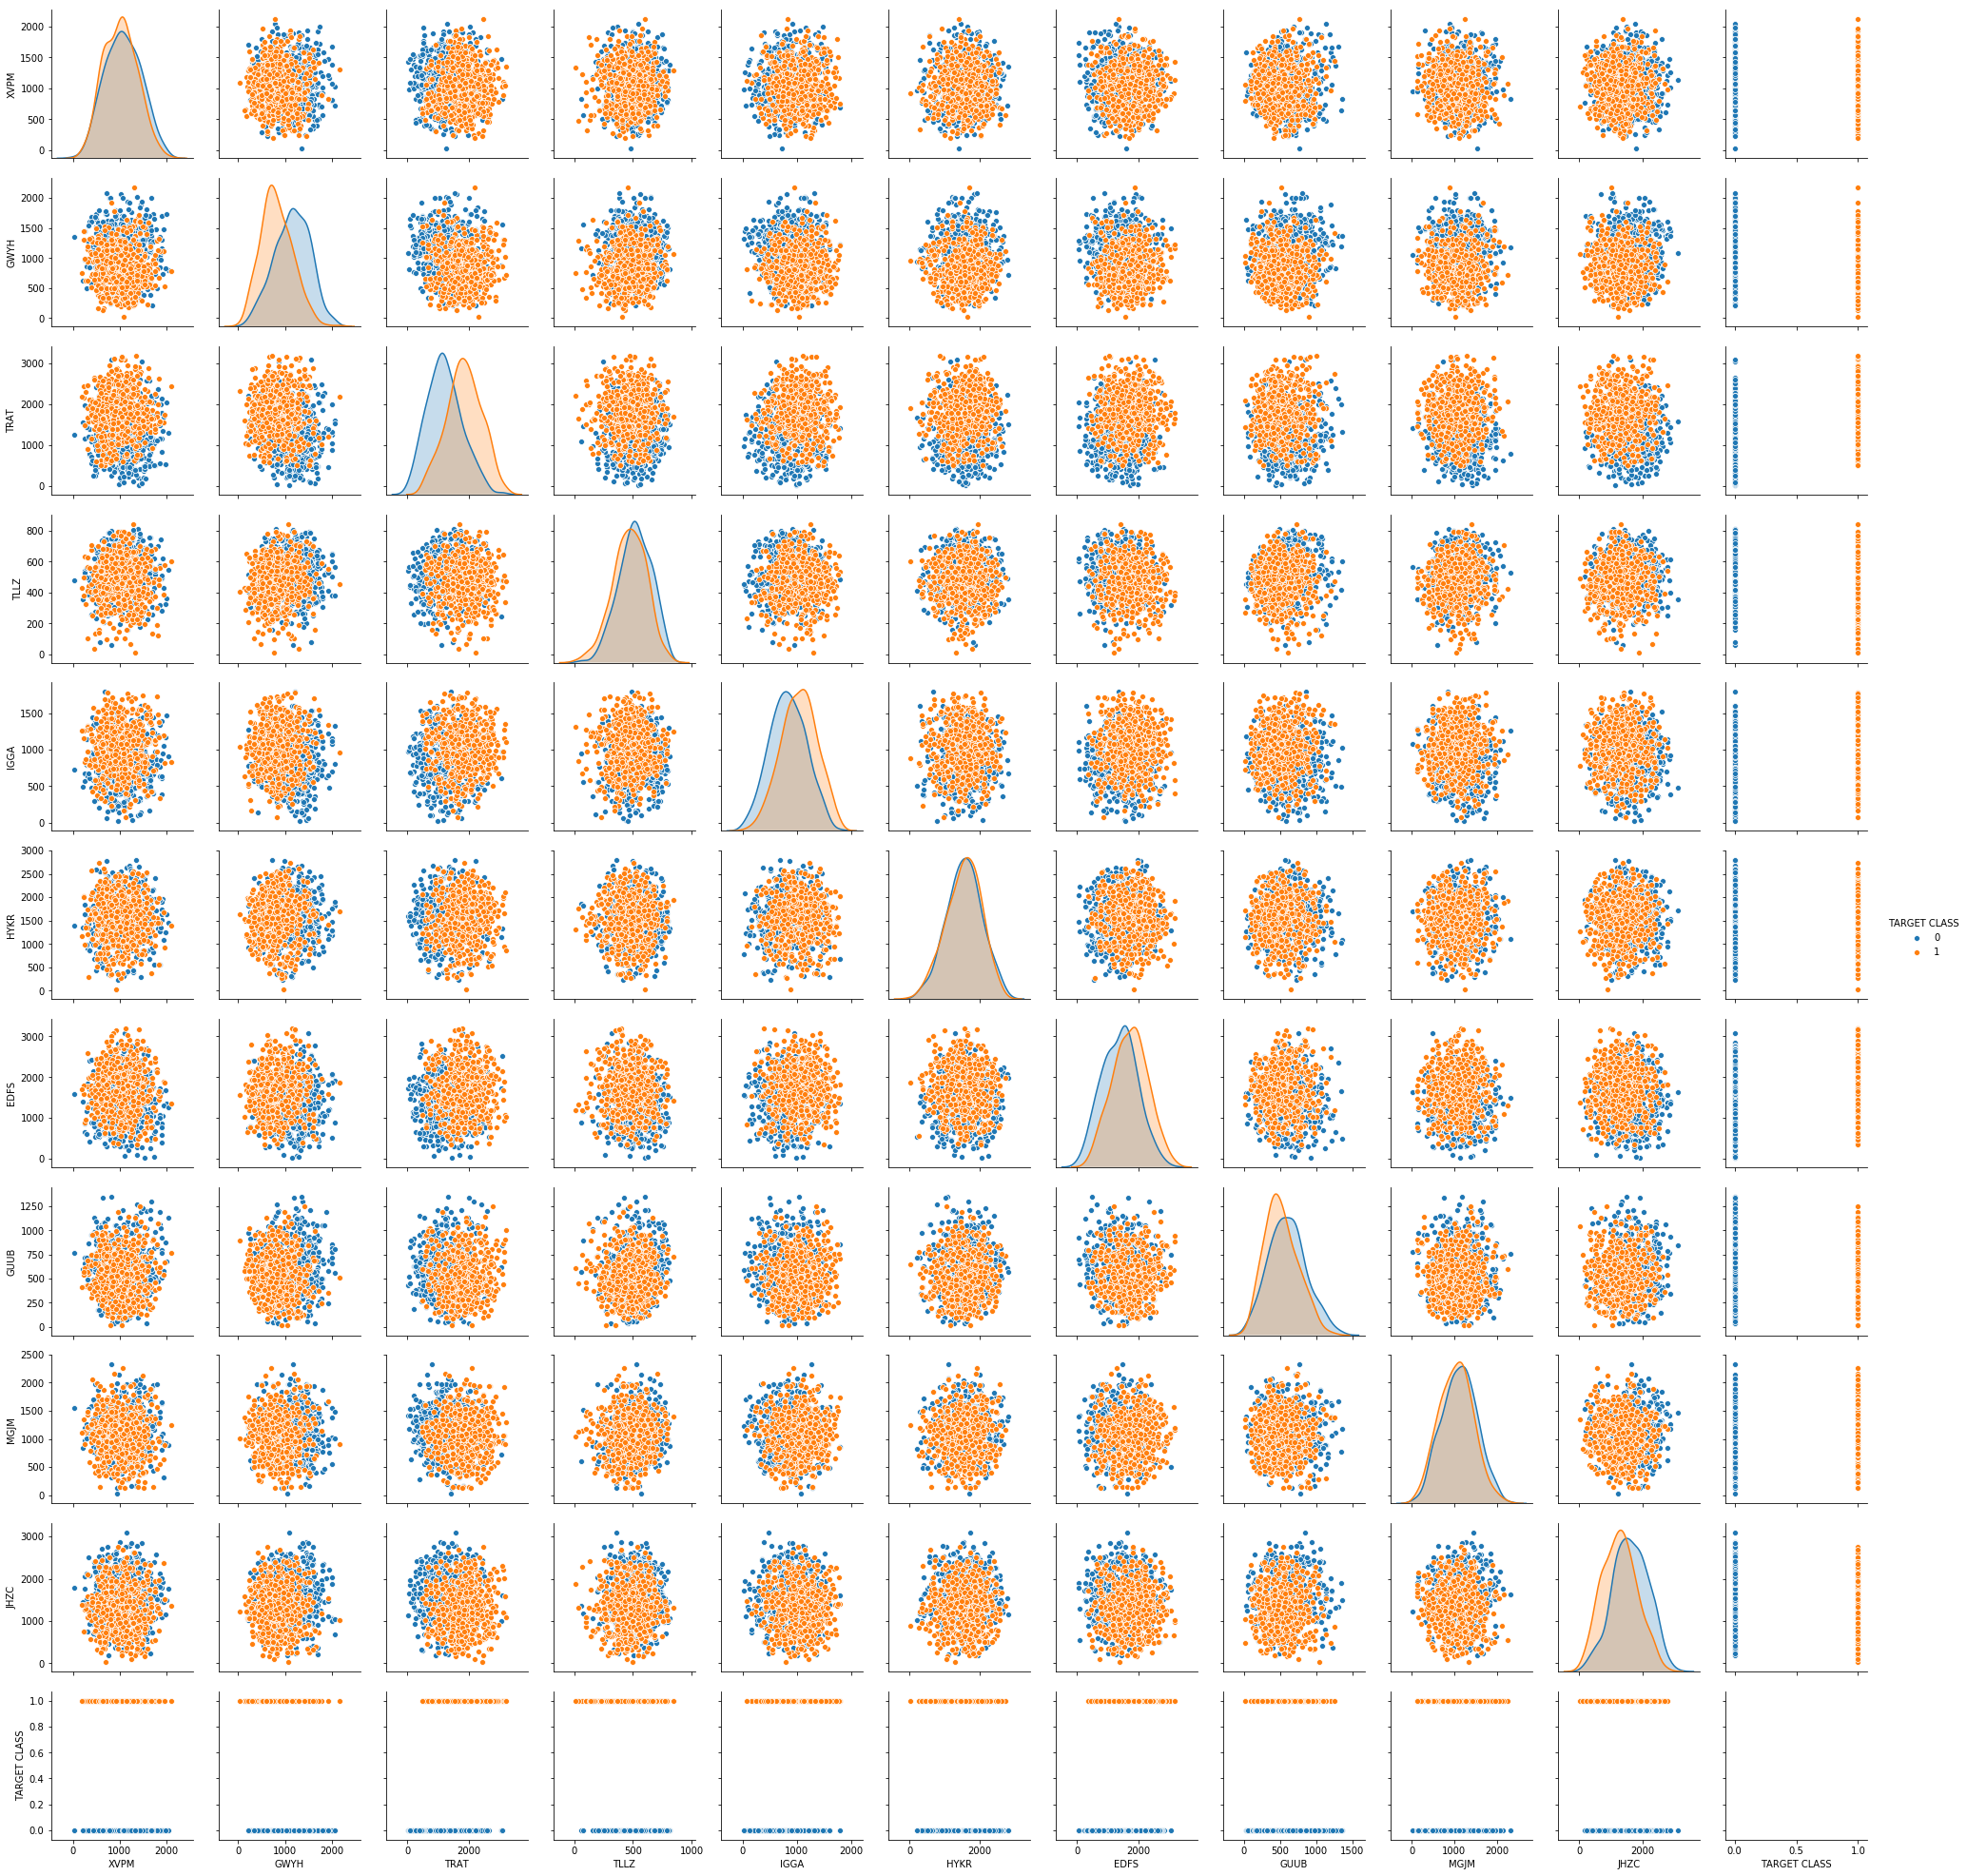

In [6]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df,hue='TARGET CLASS')
plt.show()

# Train and Test split

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('TARGET CLASS',axis=1)
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)

# Preprocessing: standarization

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training: KNN

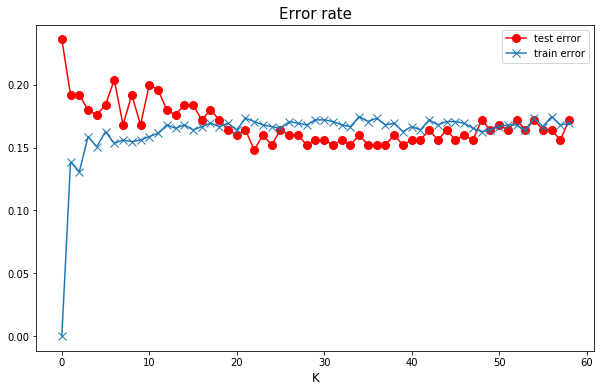

In [10]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
error_rate_train = []

for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
    
    knn_train = KNeighborsClassifier(n_neighbors=i)
    knn_train.fit(X_train_scaled,y_train)
    knn_train_pred_i = knn_train.predict(X_train_scaled)
    error_rate_train.append(np.mean(knn_train_pred_i != y_train))

    
plt.figure(figsize=(10,6))
plt.plot(error_rate,marker='o',markersize=8,label='test error',c='red')
plt.plot(error_rate_train,marker='x',markersize=8,label='train error')
plt.xlabel('K',fontsize=12)
plt.title('Error rate',fontsize=15)
plt.legend()
plt.show()

## KNN model with K = 22

In [11]:
knn = KNeighborsClassifier(n_neighbors=22).fit(X_train_scaled,y_train)

# Predictions and Evaluations

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict = knn.predict(X_test_scaled)

In [13]:
pd.DataFrame(confusion_matrix(y_test,y_predict),index=['True 0','True 1'],
             columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
True 0,111,25
True 1,16,98


In [14]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       136
           1       0.80      0.86      0.83       114

   micro avg       0.84      0.84      0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



## KNN model with K = 1 (for comparison)

In [15]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_scaled,y_train)
y_predict = knn.predict(X_test_scaled)
pd.DataFrame(confusion_matrix(y_test,y_predict),index=['True 0','True 1'],
             columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
True 0,101,35
True 1,24,90


In [16]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       136
           1       0.72      0.79      0.75       114

   micro avg       0.76      0.76      0.76       250
   macro avg       0.76      0.77      0.76       250
weighted avg       0.77      0.76      0.76       250



# Conclusion
For the given anonymous dataset, a simple KNN algorithm was quickly applied in an attempt to classify the target variables into 0 or 1. When K=1, the f1-score was ~ 0.76, but based on the "Error rate" figure, it can be seen that the model is overfitting in this case. By chossing **K=22**, the model could not only generalize, but also maximize the classification performance to (f1-score: 0.84) on the test set.